In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [75]:
!pip install dagshub mlflow --quiet
import dagshub
import mlflow

In [76]:
dagshub.init(repo_owner='nkikn21', repo_name='House-Prices', mlflow=True)


Initialized MLflow to track repo "nkikn21/House-Prices"

Repository nkikn21/House-Prices initialized!

In [77]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [126]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.shape

(1460, 81)

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Train/Test Split**

In [127]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 80), (292, 80), (1168,), (292,))

In [128]:
train_ids = X_train.pop('Id')
X_test_ids = X_test.pop('Id')

# **Cleaning**

In [14]:
# train_missings = X_train.isna().sum()
# train_missings = train_missings[train_missings>0]
# train_missings

LotFrontage      217
Alley           1094
MasVnrType       683
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64

In [106]:
missing_before = X_train.isna().sum().sum() + X_test.isna().sum().sum()
missing_before

7829

In [53]:
X_train.shape, X_test.shape

((1168, 79), (292, 79))

In [17]:
# missing_percentage = train_missings/X_train.shape[0] 
# missing_percentage > 0.8

In [129]:
cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
for col in cols_to_drop:
    X_train = X_train.drop(col, axis=1)
    X_test = X_test.drop(col, axis=1)
#drop columns which have most of nan values

**Model v3**

In [83]:
# for col in X_train.columns:
#     if X_train[col].isnull().any():
#         if X_train[col].dtype == 'object':
#             X_train[col] = X_train[col].fillna(X_train[col].mode()[0])  
#         else:
#             X_train[col] = X_train[col].fillna(X_train[col].median()) 
            
# for col in X_test.columns:
#     if X_test[col].isnull().any():
#         if X_test[col].dtype == 'object':
#             X_test[col] = X_test[col].fillna(X_train[col].mode()[0])  
#         else:
#             X_test[col] = X_test[col].fillna(X_train[col].median()) 

In [108]:
missing_cols = ["LotFrontage", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond",
                "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu",
                "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]

# print(X_train[missing_cols].dtypes)

float_missings = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
object_missings = ["BsmtQual", "MasVnrType", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType",
                "GarageFinish", "GarageQual", "GarageCond"]


In [21]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.histplot(X_train["LotFrontage"], bins=30, kde=True)
# plt.show()

# sns.histplot(X_train["MasVnrArea"], bins=30, kde=True)
# plt.show()

# sns.histplot(X_train["GarageYrBlt"], bins=30, kde=True)
# plt.show()


**MasVnrArea Handling**

In [130]:
masVn_median = X_train["MasVnrArea"].median() 

X_train["MasVnrArea"] = X_train["MasVnrArea"].fillna(masVn_median)
X_test["MasVnrArea"] = X_test["MasVnrArea"].fillna(masVn_median)

# იმიტორო არასიმეტრიული განაწილებააქ და საშუალოზე აკურატულ შედეგს მედიანა მოგვგცემს.

**GarageYrBlt Handling**

In [131]:
garage_median = X_train["GarageYrBlt"].median()

X_train["GarageYrBlt"] = X_train["GarageYrBlt"].fillna(garage_median)
X_test["GarageYrBlt"] = X_test["GarageYrBlt"].fillna(garage_median)

# X_train["GarageYrBlt"] = X_train["GarageYrBlt"].fillna(0)
# X_test["GarageYrBlt"] = X_test["GarageYrBlt"].fillna(0)
# იმიტორო არასიმეტრიული განაწილებააქ და საშუალოზე აკურატულ შედეგს მედიანა მოგვგცემს ან 0-ებით შევსება, თუ იმიტო აკლია მონაცემები რო არ აშენებულა

**LotFrontage Handling**

In [132]:
lot_mean = X_train["LotFrontage"].mean()

X_train["LotFrontage"] = X_train["LotFrontage"].fillna(lot_mean) 
X_test["LotFrontage"] = X_test["LotFrontage"].fillna(lot_mean) 

# lot_median = X_train['LotFrontage'].median()

# X_train["LotFrontage"] = X_train["LotFrontage"].fillna(lot_median)
# X_test["LotFrontage"] = X_test["LotFrontage"].fillna(lot_median)

# X_train["LotFrontage"] = X_train["LotFrontage"].fillna(0)
# X_test["LotFrontage"] = X_test["LotFrontage"].fillna(0)

**Categorical_missings**

In [133]:
object_missings = ["BsmtQual", "MasVnrType", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType",
                "GarageFinish", "GarageQual", "GarageCond"]
# X_train[object_missings].head()

**Handle categorical missings**

In [134]:
for col in object_missings:
    cat_mean = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(cat_mean)
    X_test[col] = X_test[col].fillna(cat_mean)

In [135]:
missing_after = X_train.isna().sum().sum() + X_test.isna().sum().sum()
missing_after

0

In [29]:
X_train.shape, X_test.shape

((1168, 75), (292, 75))

In [87]:
import mlflow

experiment_name = 'Handle_missing_values'
run_name = 'Cleaning_v3'

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

dropped_cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
mlflow.log_param("dropped_columns", ", ".join(dropped_cols))

mlflow.log_param("MasVnrArea_imputation", "median")
mlflow.log_param("GarageYrBlt_imputation", "median")
mlflow.log_param("LotFrontage_imputation", "median")
mlflow.log_param("categorical_imputation", "mode")

mlflow.log_metric("missing_values_before", missing_before)
mlflow.log_metric("missing_values_after", missing_after)

mlflow.end_run()


🏃 View run Cleaning_v3 at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/1/runs/8f66163b47294571b6b43b7d52cc29a2
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/1


# **Feature Engineering**

In [78]:
# cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
# print(cat_cols)

In [32]:
# for col in cat_cols:
#     print(X_train[col].value_counts())

MSZoning
RL         924
RM         172
FV          53
RH          15
C (all)      4
Name: count, dtype: int64
Street
Pave    1164
Grvl       4
Name: count, dtype: int64
LotShape
Reg    729
IR1    394
IR2     37
IR3      8
Name: count, dtype: int64
LandContour
Lvl    1059
Bnk      48
HLS      35
Low      26
Name: count, dtype: int64
Utilities
AllPub    1167
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     822
Corner     221
CulDSac     84
FR2         38
FR3          3
Name: count, dtype: int64
LandSlope
Gtl    1108
Mod      51
Sev       9
Name: count, dtype: int64
Neighborhood
NAmes      181
CollgCr    115
OldTown     91
Edwards     87
Somerst     69
NWAmes      66
Gilbert     65
NridgHt     61
Sawyer      58
BrkSide     45
Crawfor     44
SawyerW     44
Mitchel     40
NoRidge     33
Timber      28
IDOTRR      26
SWISU       21
StoneBr     20
ClearCr     19
Blmngtn     15
BrDale      13
MeadowV     10
Veenker      9
NPkVill      7
Blueste      1
Name: count, dtype: int64
Con

In [136]:
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
s = X_train[cat_cols].nunique()
s

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        4
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [137]:
threshold = 3
# threshold = 4

one_hot_columns = list(s[s <= threshold].index)
woe_columns = list(s[s > threshold].index)
# one_hot_columns, woe_columns

# One_hot 

In [138]:
from sklearn.preprocessing import OneHotEncoder
import mlflow
import os
import pandas as pd

# MLflow experiment and run setup
experiment_name = 'Handle_categoricals'
run_name = 'One_hot_encoding_v5'

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

# Log OHE params
mlflow.log_param("one_hot_columns", ','.join(one_hot_columns))

# OneHotEncoder setup
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
mlflow.log_param("ohe_handle_unknown", 'ignore')
mlflow.log_param("ohe_drop", 'first')
mlflow.log_param("ohe_sparse_output", False)

# Fit and transform on train
X_train_ohe = pd.DataFrame(
    ohe.fit_transform(X_train[one_hot_columns]),
    columns=ohe.get_feature_names_out(one_hot_columns),
    index=X_train.index
)

# Transform test
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test[one_hot_columns]),
    columns=ohe.get_feature_names_out(one_hot_columns),
    index=X_test.index
)

# Drop original categorical columns and join OHE features
X_train_final = X_train.drop(columns=one_hot_columns).join(X_train_ohe)
X_test_final  = X_test.drop(columns=one_hot_columns).join(X_test_ohe)

# Save & log artifact samples
os.makedirs("logs", exist_ok=True)
X_train_ohe.head().to_csv("logs/X_train_ohe_head.csv", index=False)
X_test_ohe.head().to_csv("logs/X_test_ohe_head.csv", index=False)
X_train_final.to_csv("logs/final_X_train.csv", index=False)
X_test_final.to_csv("logs/final_X_test.csv", index=False)

mlflow.log_param("X_train_final_shape", str(X_train_final.shape))
mlflow.log_param("X_test_final_shape", str(X_test_final.shape))
mlflow.log_artifact("logs/X_train_ohe_head.csv")
mlflow.log_artifact("logs/X_test_ohe_head.csv")
mlflow.log_artifact("logs/final_X_train.csv")
mlflow.log_artifact("logs/final_X_test.csv")

# Log fitted encoder
mlflow.sklearn.log_model(ohe, artifact_path="one_hot_encoder")

mlflow.end_run()

# Update your working train/test sets
X_train = X_train_final
X_test = X_test_final


2025/04/09 20:46:03 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/04/09 20:46:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run One_hot_encoding_v5 at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/2/runs/a7a6b73bf0e8415a822242a5eb24ee67
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/2


In [62]:
mlflow.end_run()

🏃 View run LinearRegression_v3_KFold at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4/runs/aa7822e48edd44998058da6567247d1a
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4


In [37]:
# X_train.head()

# WOE

In [139]:
from category_encoders.woe import WOEEncoder

experiment_name = 'Handle_categoricals'
run_name = 'WOE_encoding_v5'

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

threshold = y_train.median()
y_binary = (y_train > threshold).astype(int)

mlflow.log_param("woe_target_threshold", threshold)
mlflow.log_param("woe_columns", ','.join(woe_columns))

woe_encoder = WOEEncoder(cols=woe_columns)
woe_encoder.fit(X_train[woe_columns], y_binary)

X_train_woe = woe_encoder.transform(X_train[woe_columns])
X_test_woe = woe_encoder.transform(X_test[woe_columns])

X_train_final = X_train.drop(columns=woe_columns).join(X_train_woe)
X_test_final = X_test.drop(columns=woe_columns).join(X_test_woe)

os.makedirs("logs", exist_ok=True)
X_train_woe.head().to_csv("logs/X_train_woe_head.csv", index=False)
X_test_woe.head().to_csv("logs/X_test_woe_head.csv", index=False)
X_train_final.to_csv("logs/final_X_train.csv", index=False)
X_test_final.to_csv("logs/final_X_test.csv", index=False)

mlflow.log_param("X_train_final_shape", str(X_train_final.shape))
mlflow.log_param("X_test_final_shape", str(X_test_final.shape))
mlflow.log_artifact("logs/X_train_woe_head.csv")
mlflow.log_artifact("logs/X_test_woe_head.csv")
mlflow.log_artifact("logs/final_X_train.csv")
mlflow.log_artifact("logs/final_X_test.csv")

mlflow.sklearn.log_model(woe_encoder, artifact_path="woe_encoder")

mlflow.end_run()

X_train = X_train_final
X_test = X_test_final


2025/04/09 20:46:25 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/04/09 20:46:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run WOE_encoding_v5 at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/2/runs/f1233cd245894f1992a6c4e5a451b663
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/2


In [39]:
# X_train.head()

In [140]:
cat = X_train.select_dtypes(include='object')
cat

""
254
1066
638
799
380
...
1095
1130
1294
860


In [41]:
X_train.shape

(1168, 79)

# **Feature Selection**

# Correlation Filter

In [93]:
import numpy as np
import pandas as pd

# Compute correlation matrix
corr_matrix = X_train.corr().abs()

# Mask the upper triangle
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper = corr_matrix.where(mask)

# Set your threshold
threshold = 0.9

# Find pairs with correlation above the threshold (excluding self-correlations)
high_corr_pairs = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if pd.notnull(upper.loc[row, col]) and upper.loc[row, col] > threshold
]

# Print the highly correlated pairs
if high_corr_pairs:
    print("Highly correlated feature pairs:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} and {feat2}: {corr:.4f}")
else:
    print(f"No feature pairs with correlation above {threshold} found.")

# Decide which feature to drop from each pair
features_to_drop = []
for feat1, feat2, _ in high_corr_pairs:
    corr1 = abs(X_train[feat1].corr(y_train))
    corr2 = abs(X_train[feat2].corr(y_train))
    features_to_drop.append(feat1 if corr1 < corr2 else feat2)

# Remove duplicates
features_to_drop = list(set(features_to_drop))
print(f"\nFeatures to drop due to high correlation: {features_to_drop}")

# Drop them
X_train_filtered = X_train.drop(columns=features_to_drop)
X_test_filtered = X_test.drop(columns=features_to_drop)
print(f"\nOriginal train shape: {X_train.shape}, New shape: {X_train_filtered.shape}")
print(f"\nOriginal test shape: {X_test.shape}, New shape: {X_test_filtered.shape}")



Highly correlated feature pairs:
MasVnrType_Stone and MasVnrType_BrkFace: 0.9380
ExterQual_TA and ExterQual_Gd: 0.9056
Exterior2nd and Exterior1st: 0.9229

Features to drop due to high correlation: ['ExterQual_Gd', 'MasVnrType_BrkFace', 'Exterior2nd']

Original train shape: (1168, 95), New shape: (1168, 92)

Original test shape: (292, 95), New shape: (292, 92)


In [69]:
# X_train = X_train_filtered
# X_test = X_test_filtered 

In [94]:
import os

experiment_name = "Feature_Selection"
run_name = "Correlation_Filter_v3"

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

mlflow.log_param("correlation_threshold", threshold)
mlflow.log_param("num_high_corr_pairs", len(high_corr_pairs))
mlflow.log_param("num_features_dropped", len(features_to_drop))
mlflow.log_param("features_dropped", ','.join(features_to_drop))

os.makedirs("logs", exist_ok=True)

pd.Series(features_to_drop).to_csv("logs/correlation_dropped_features.csv", index=False)
mlflow.log_artifact("logs/correlation_dropped_features.csv")

mlflow.log_param("X_train_original_shape", str(X_train.shape))
mlflow.log_param("X_train_filtered_shape", str(X_train_filtered.shape))
mlflow.log_param("X_test_original_shape", str(X_test.shape))
mlflow.log_param("X_test_filtered_shape", str(X_test_filtered.shape))

X_train_filtered.head().to_csv("logs/X_train_filtered_head.csv", index=False)
mlflow.log_artifact("logs/X_train_filtered_head.csv")
X_test_filtered.head().to_csv("logs/X_test_filtered_head.csv", index=False)
mlflow.log_artifact("logs/X_test_filtered_head.csv")

mlflow.end_run()

X_train = X_train_filtered
X_test = X_test_filtered 

🏃 View run Correlation_Filter_v3 at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/3/runs/e1628c5803c445e78fef609e9fe4d7e4
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/3


# RFE

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(X_train_scaled, y_train)

rfe_selected_features = X_train.columns[rfe.support_].tolist()

print("Features selected by RFE:")
for i, feature in enumerate(rfe_selected_features, 1):
    print(f"{i}. {feature}")

Features selected by RFE:
1. OverallQual
2. 1stFlrSF
3. 2ndFlrSF
4. BsmtFullBath
5. GarageCars
6. BsmtQual_Gd
7. BsmtQual_TA
8. KitchenQual_Gd
9. KitchenQual_TA
10. Neighborhood


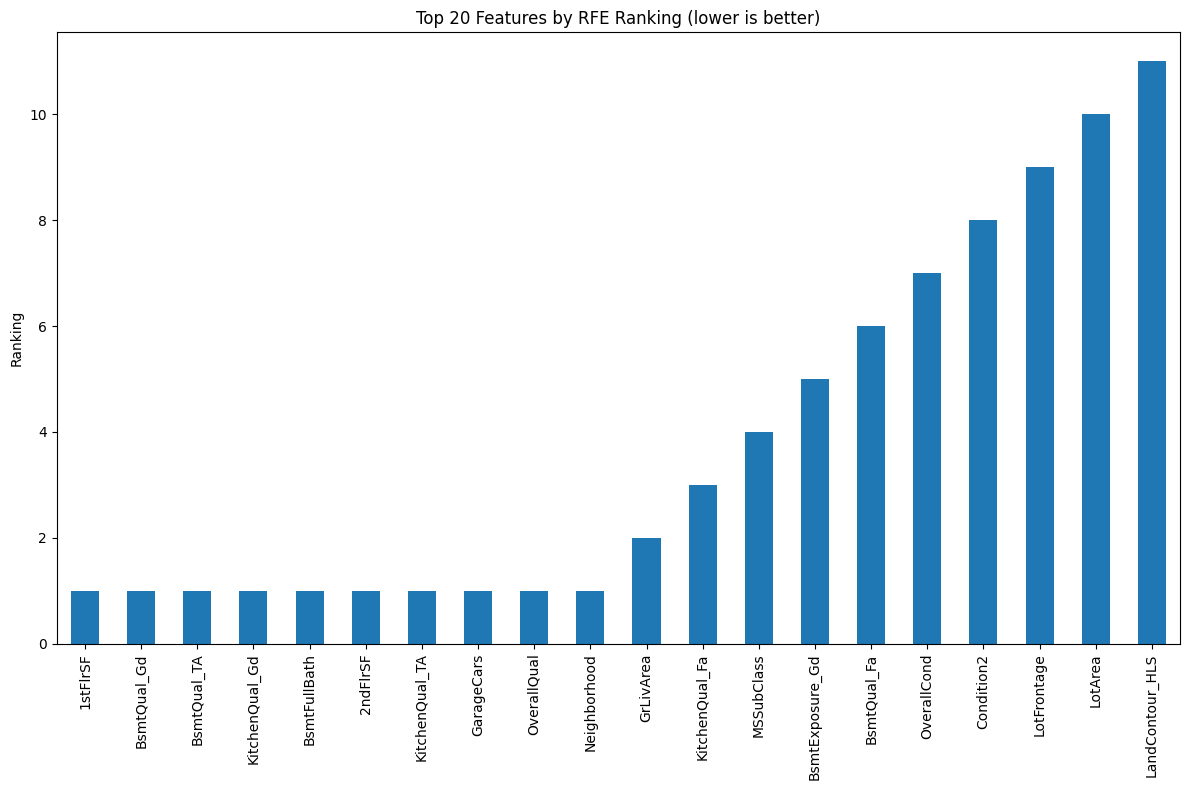

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
feature_ranking = pd.Series(rfe.ranking_, index=X_train.columns)
feature_ranking.sort_values().head(20).plot(kind='bar')
plt.title('Top 20 Features by RFE Ranking (lower is better)')
plt.ylabel('Ranking')
plt.tight_layout()
plt.show()

In [97]:
experiment_name = "Feature_Selection"
run_name = "RFE_v3"

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

mlflow.log_param("scaler", "StandardScaler")
mlflow.log_param("rfe_estimator", "LinearRegression")
mlflow.log_param("rfe_num_features_selected", 10)
mlflow.log_param("rfe_step", 1)
mlflow.log_param("rfe_selected_features", ','.join(rfe_selected_features))

mlflow.end_run()

🏃 View run RFE_v3 at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/3/runs/5eb3c8d04e89428783c00abc2bf679c0
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/3


# **Training**

***Linear Regression***

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd

def log_rmse(y_true, y_pred):
    y_pred = np.clip(y_pred, 1, None)
    y_true = np.clip(y_true, 1, None)
    return np.sqrt(np.mean((np.log(y_pred) - np.log(y_true)) ** 2))

# Initialize model
model_type = "LinearRegression_v2"
model_params = {}
experiment_name = "Model_Training"
run_name = f"{model_type}_KFold"

# MLflow setup
mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

mlflow.log_param("model_type", model_type)
mlflow.log_param("n_splits", 5)
mlflow.log_param("rfe_features_used", ','.join(rfe_selected_features))

# Prepare data
X_kfold = X_train_scaled[rfe_selected_features]
y_kfold = y_train.reset_index(drop=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_log_rmse = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_kfold), 1):
    X_train_fold, X_val_fold = X_kfold.iloc[train_idx], X_kfold.iloc[val_idx]
    y_train_fold, y_val_fold = y_kfold.iloc[train_idx], y_kfold.iloc[val_idx]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    
    y_pred = model.predict(X_val_fold)

    log_rmse_score = log_rmse(y_val_fold, y_pred)

    fold_log_rmse.append(log_rmse_score)

    mlflow.log_metric(f"log_rmse_fold_{fold}", log_rmse_score)

# Log average metrics
mlflow.log_metric("avg_log_rmse", np.mean(fold_log_rmse))

# Fit final model on all data and log it
final_model = LinearRegression()
final_model.fit(X_kfold, y_kfold)

mlflow.sklearn.log_model(final_model, artifact_path="final_model")

mlflow.end_run()

print(np.mean(fold_log_rmse))



2025/04/09 17:20:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LinearRegression_v2_KFold at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4/runs/c398f06a89614c47a509924d58678c78
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4
0.27927861735672954


***Without KFold***

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import mlflow
import numpy as np

experiment_name = "Model_Training"
run_name = "LinearRegression_v3"

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

mlflow.log_param("model_type", model_type)
mlflow.log_param("features_used", ','.join(rfe_selected_features))

def log_rmse(y_true, y_pred):
    y_pred = np.clip(y_pred, 1, None)
    y_true = np.clip(y_true, 1, None)
    return np.sqrt(np.mean((np.log(y_pred) - np.log(y_true)) ** 2))

X_train_final = X_train_scaled[rfe_selected_features]
y_train_final = y_train

model = LinearRegression()
model.fit(X_train_final, y_train_final)

y_pred = model.predict(X_train_final)
test_log_rmse = log_rmse(y_train_final, y_pred)

mlflow.sklearn.log_model(model, "final_model")

mlflow.log_metric("log_rmse_train", test_log_rmse)

mlflow.end_run()

print(test_log_rmse)

2025/04/09 19:16:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LinearRegression_v3 at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4/runs/e6cfd6f8e7c34c3c87f95e53464ce627
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4
0.17728189383668982


***Prediction on test set***

In [101]:
experiment_name = "Model_Training"
run_name = "Final_model_v3"

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

# Apply scaler and RFE to test set
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),  # Use fitted scaler
    columns=X_test.columns
)
X_test_final = X_test_scaled[rfe_selected_features]

# Predict and evaluate
y_pred_test = model.predict(X_test_final)
test_log_rmse = log_rmse(y_test, y_pred_test)

# Log test metrics
mlflow.log_metric("test_log_rmse", test_log_rmse)

mlflow.end_run()

print(test_log_rmse)



🏃 View run Final_model_v3 at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4/runs/a9586262264646e5ad74a832f786f305
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4
0.183609678151749


# Tree Based Models

In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import mlflow
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Define log_rmse metric
def log_rmse(y_true, y_pred):
    y_pred = np.clip(y_pred, 1, None)
    y_true = np.clip(y_true, 1, None)
    return np.sqrt(np.mean((np.log(y_pred) - np.log(y_true)) ** 2))

# Scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)


**Decision Tree**

In [125]:
from sklearn.tree import DecisionTreeRegressor

model_type = "DecisionTreeRegressor_RFE"
experiment_name = "Model_Training"
run_name = f"{model_type}_Final"

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

# ---------------- Feature Selection (RFE) ----------------
dt_model = DecisionTreeRegressor(random_state=42)
rfe_dt = RFE(estimator=dt_model, n_features_to_select=15)
rfe_dt.fit(X_train_scaled, y_train)

rfe_selected_features = X_train.columns[rfe_dt.support_].tolist()
mlflow.log_param("rfe_features_used", ','.join(rfe_selected_features))

# ---------------- Train Final Model ----------------
X_train_final = X_train_scaled[rfe_selected_features]
X_test_final = X_test_scaled[rfe_selected_features]

final_model_dt = DecisionTreeRegressor(random_state=42)
final_model_dt.fit(X_train_final, y_train)

# ---------------- Predict & Evaluate ----------------
y_pred_dt = final_model_dt.predict(X_test_final)
log_rmse_dt = log_rmse(y_test, y_pred_dt)

mlflow.log_metric("test_log_rmse", log_rmse_dt)

mlflow.sklearn.log_model(final_model_dt, artifact_path="final_model_dt")
mlflow.end_run()

print("Decision Tree - log RMSE:", log_rmse_dt)

2025/04/09 20:18:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DecisionTreeRegressor_RFE_Final at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4/runs/7bfbc37e289948ffacdeaf4e078534fd
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4
Decision Tree - log RMSE: 0.22557799970993406


In [124]:
from sklearn.tree import DecisionTreeRegressor

model_type = "DecisionTreeRegressor"
experiment_name = "Model_Training"
run_name = f"{model_type}_Final"

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

final_model_dt = DecisionTreeRegressor(random_state=42)
final_model_dt.fit(X_train_scaled, y_train)

y_pred_dt = final_model_dt.predict(X_test_scaled)
log_rmse_dt = log_rmse(y_test, y_pred_dt)

mlflow.log_metric("test_log_rmse", log_rmse_dt)

mlflow.sklearn.log_model(final_model_dt, artifact_path="final_model_dt")
mlflow.end_run()

print("Decision Tree - log RMSE:", log_rmse_dt)

2025/04/09 20:16:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DecisionTreeRegressor_Final at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4/runs/7bd725d8375f4377bbc4c0daf39abe55
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4
Decision Tree - log RMSE: 0.1943681117385766


**Random Forest**

In [142]:
from sklearn.ensemble import RandomForestRegressor

model_type = "RandomForestRegressor_RFE"
experiment_name = "Model_Training"
run_name = f"{model_type}_Final"

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfe_rf = RFE(estimator=rf_model, n_features_to_select=15)
rfe_rf.fit(X_train_scaled, y_train)

rfe_selected_features = X_train.columns[rfe_rf.support_].tolist()
mlflow.log_param("rfe_features_used", ','.join(rfe_selected_features))
mlflow.log_param("n_estimators", '100')

# ---------------- Train Final Model ----------------
X_train_final = X_train_scaled[rfe_selected_features]
X_test_final = X_test_scaled[rfe_selected_features]

final_model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
final_model_rf.fit(X_train_final, y_train)

# ---------------- Predict & Evaluate ----------------
y_pred_rf = final_model_rf.predict(X_test_final)
log_rmse_rf = log_rmse(y_test, y_pred_rf)

mlflow.log_metric("test_log_rmse", log_rmse_rf)

mlflow.sklearn.log_model(final_model_rf, artifact_path="final_model_rf")
mlflow.end_run()

print("Random Forest - log RMSE:", log_rmse_rf)


2025/04/09 20:48:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestRegressor_RFE_Final at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4/runs/a6cea802b2aa4cbe9e5fe551a7938c66
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4
Random Forest - log RMSE: 0.15771124023296137


In [143]:
from sklearn.ensemble import RandomForestRegressor

model_type = "RandomForestRegressor"
experiment_name = "Model_Training"
run_name = f"{model_type}_Final"

mlflow.set_experiment(experiment_name)
mlflow.start_run(run_name=run_name)

final_model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
final_model_rf.fit(X_train_scaled, y_train)

mlflow.log_param("n_estimators", '100')

y_pred_rf = final_model_rf.predict(X_test_scaled)
log_rmse_rf = log_rmse(y_test, y_pred_rf)

mlflow.log_metric("test_log_rmse", log_rmse_rf)

mlflow.sklearn.log_model(final_model_rf, artifact_path="final_model_rf")
mlflow.end_run()

print("Random Forest - log RMSE:", log_rmse_rf)


2025/04/09 20:48:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForestRegressor_Final at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4/runs/44e98da9148743b3a85f1fe3fb7d03a0
🧪 View experiment at: https://dagshub.com/nkikn21/House-Prices.mlflow/#/experiments/4
Random Forest - log RMSE: 0.14688736699922267
